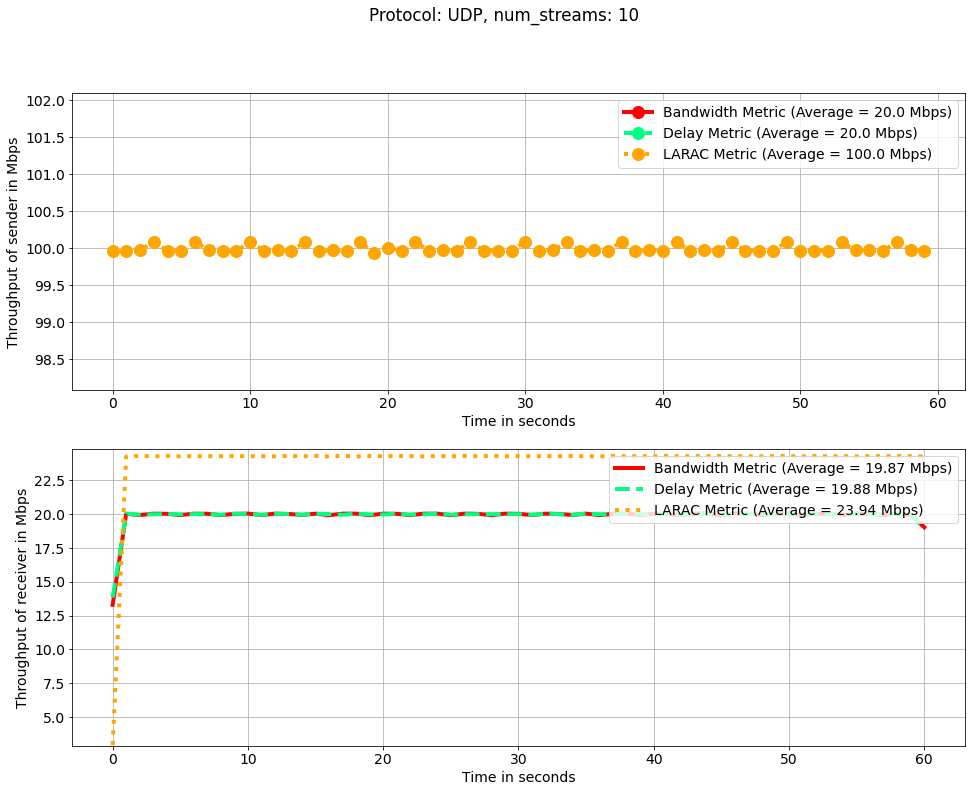

In [2]:
import json
import matplotlib
import matplotlib.pyplot as plt
f2=open("receiver_bandwidth.json","w")
f2.truncate(0)
lines = []
with open('receiver_bandwidth.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

f2=open("receiver_delay.json","w")
f2.truncate(0)
lines = []
with open('receiver_delay.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

f2=open("receiver_larac.json","w")
f2.truncate(0)
lines = []
with open('receiver_larac.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

font = {'size'   : 14}
matplotlib.rc('font', **font)
width = 0.3
fig, axs = plt.subplots(2,figsize=(16,12))

sender_bandwidth= json.load(open('sender_bandwidth.json', 'r'))
sender_delay = json.load(open('sender_delay.json', 'r'))
sender_larac = json.load(open('sender_larac.json', 'r'))

yAxis_1 = []
for intervals in sender_bandwidth["intervals"]:
    yAxis_1.append(intervals["sum"]["bits_per_second"]/1000000)
yAxis_2 = []
for intervals in sender_delay["intervals"]:
    yAxis_2.append(intervals["sum"]["bits_per_second"]/1000000)
yAxis_3 = []
for intervals in sender_larac["intervals"]:
    yAxis_3.append(intervals["sum"]["bits_per_second"]/1000000)
    
avr_1 = round(sum(yAxis_1)/len(yAxis_1),2)
avr_2 = round(sum(yAxis_2)/len(yAxis_2),2)
avr_3 = round(sum(yAxis_3)/len(yAxis_3),2)

axs[0].set_ylim(max([max(yAxis_1),max(yAxis_2),max(yAxis_3)])*0.98,max([max(yAxis_1),max(yAxis_2),max(yAxis_3)])*1.02)
axs[0].set_xlabel('Time in seconds')
axs[0].set_ylabel('Throughput of sender in Mbps')
axs[0].plot(yAxis_1, label = "Bandwidth Metric (Average = "+str(avr_1)+" Mbps)", linewidth = '4', color='red', marker = 'o',ms = 12)
axs[0].plot(yAxis_2, label = "Delay Metric (Average = "+str(avr_2)+" Mbps)", linewidth = '4', color='springgreen', marker = 'o', linestyle = 'dashed',ms = 12)
axs[0].plot(yAxis_3, label = "LARAC Metric (Average = "+str(avr_3)+" Mbps)", linewidth = '4', color='orange', marker = 'o', linestyle = 'dotted',ms = 12)
axs[0].legend(loc="upper right")
axs[0].grid()

receiver_bandwidth= json.load(open('receiver_bandwidth.json', 'r'))
receiver_delay = json.load(open('receiver_delay.json', 'r'))
receiver_larac = json.load(open('receiver_larac.json', 'r'))

yAxis_1 = []
for intervals in receiver_bandwidth["intervals"]:
    yAxis_1.append(intervals["sum"]["bits_per_second"]/1000000)
yAxis_2 = []
for intervals in receiver_delay["intervals"]:
    yAxis_2.append(intervals["sum"]["bits_per_second"]/1000000)
yAxis_3 = []
for intervals in receiver_larac["intervals"]:
    yAxis_3.append(intervals["sum"]["bits_per_second"]/1000000)
    
avr_1 = round(sum(yAxis_1)/len(yAxis_1),2)
avr_2 = round(sum(yAxis_2)/len(yAxis_2),2)
avr_3 = round(sum(yAxis_3)/len(yAxis_3),2)

axs[1].set_ylim(min([min(yAxis_1),min(yAxis_2),min(yAxis_3)])*0.98,max([max(yAxis_1),max(yAxis_2),max(yAxis_3)])*1.02)
axs[1].set_xlabel('Time in seconds')
axs[1].set_ylabel('Throughput of receiver in Mbps')
axs[1].plot(yAxis_1, label = "Bandwidth Metric (Average = "+str(avr_1)+" Mbps)", linewidth = '4', color='red',ms = 12)
axs[1].plot(yAxis_2, label = "Delay Metric (Average = "+str(avr_2)+" Mbps)", linewidth = '4', color='springgreen', linestyle = 'dashed',ms = 12)
axs[1].plot(yAxis_3, label = "LARAC Metric (Average = "+str(avr_3)+" Mbps)", linewidth = '4', color='orange', linestyle = 'dotted',ms = 12)
axs[1].legend(loc="upper right")
axs[1].grid()

_title = "Protocol: "+ receiver_bandwidth["start"]["test_start"]["protocol"]+", "
_title = _title + "num_streams: "+ str(receiver_bandwidth["start"]["test_start"]["num_streams"])
plt.suptitle(_title)
plt.savefig("compare_throughput_"+_title+".png",dpi=200)